In [2]:
import numpy as np
import pylab as pl

from vent.common.loggers import DataLogger

2020-06-08 10:01:24,127 - vent.common.prefs - INFO - Loaded prefs from /Users/ms81/vent/prefs.json
2020-06-08 10:01:24,129 - vent.common.prefs - INFO - Saved prefs to /Users/ms81/vent/prefs.json


Get an instance of the data logger, and load a file

In [3]:
dl = DataLogger()
dff = dl.load_file("../../2020-06-04-15-54_controller_log.0.h5")

Reading... ../../2020-06-04-15-54_controller_log.0.h5


dff is adictionary. One can just extract waveform and control data

In [4]:
ls_wv = dff['waveform_data']
ls_ct = dff['control_data']

And plot it

In [5]:
data = np.zeros((len(ls_wv),2))
for idx in range(len(ls_wv)):
    data[idx,0] = ls_wv[idx][4]
    data[idx,1] = ls_wv[idx][3]

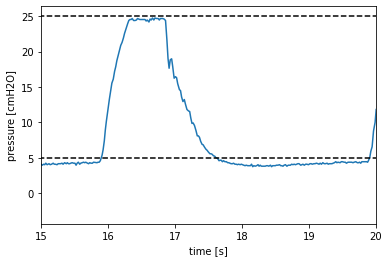

In [8]:
pl.plot(data[:,0] - np.min(data[:,0]), data[:,1])
pl.plot([0,40],[5,5],'k--')
pl.plot([0,40],[25,25],'k--')
pl.xlim([15,20])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");

# Plot some data

These are three example runs on the device

In [31]:
# Running on the dinky, PEEP = 8, PIP = 25
# dffv = dl.load_file("../../2020-06-08-10-48_controller_log.0.h5")
dffv = dl.load_file("../../2020-06-08-11-11_controller_log.0.h5")

ls_wv = dffv['waveform_data']
ls_ct = dffv['control_data']
datav = np.zeros((len(ls_wv),2))
for idx in range(len(ls_wv)):
    datav[idx,0] = ls_wv[idx][4]
    datav[idx,1] = ls_wv[idx][3]
    

# Running on the dinkey, PEEP = 8 with software, PIP = 25
dffs = dl.load_file("../../2020-06-08-11-01_controller_log.0.h5")
ls_wv = dffs['waveform_data']
ls_ct = dffs['control_data']
datas = np.zeros((len(ls_wv),2))
for idx in range(len(ls_wv)):
    datas[idx,0] = ls_wv[idx][4]
    datas[idx,1] = ls_wv[idx][3]

    
# Running on the dinkey, PEEP = PIDCONTROL to 8 in hardware PIP = 35
dffm = dl.load_file("../../2020-06-08-11-17_controller_log.0.h5")
ls_wv = dffm['waveform_data']
ls_ct = dffm['control_data']
datam = np.zeros((len(ls_wv),2))
for idx in range(len(ls_wv)):
    datam[idx,0] = ls_wv[idx][4]
    datam[idx,1] = ls_wv[idx][3]

Reading... ../../2020-06-08-11-11_controller_log.0.h5
Reading... ../../2020-06-08-11-01_controller_log.0.h5
Reading... ../../2020-06-08-11-17_controller_log.0.h5


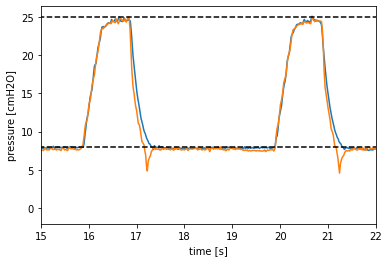

In [22]:
pl.plot(datav[:,0] - np.min(datav[:,0]), datav[:,1])
pl.plot(datas[:,0] - np.min(datas[:,0]), datas[:,1])

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[25,25],'k--')
pl.xlim([15,22])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");

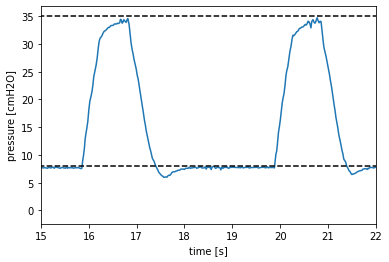

In [32]:
pl.plot(datam[:,0] - np.min(datam[:,0]), datam[:,1])

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[35,35],'k--')
pl.xlim([15,22])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");

In [ ]:
if this looks good, wire up `self._DATA_Qout = 0 #self.HAL.flow_ex`